### 00 Evaluation metrics

When it comes to machine learning problems, you will encounter a lot of different types     
of metrics in the real world.       
We will focus on supervised. The reason for this is because supervised problems are in      
abundance compared to un-supervised, and evaluation of unsupervised methods is quite subjective.

- Classification
    - Accuracy
    - Precision(P)
    - Recall(R)
    - F1 score(F1)
    - Area under the ROC(Receiver Operating Characteristic) curve or simply AUC(AUC)
    - Log loss
    - Precision at k(P@k)
    - Average precision at k(AP@k)
    - Mean average precision at k(MAP@k)


- Regression
    - Mean absolute error(MAE)
    - Mean squared error(MSE)
    - Root mean squared error(RMSE)
    - Root mean squared logarithmic error(RMSLE)
    - Mean percentage error(MPE)
    - Mean absolute percentage error(MAPE)
    - R^2

### 01 Accuracy

Accuracy Score = (TP + TN) / (TP + TN + FP + FN) 

In [ ]:
def accuracy(y_true, y_pred): 
    """ 
    Function to calculate accuracy 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score 
    """ 
    # initialize a simple counter for correct predictions 
    correct_counter = 0 
    # loop over all elements of y_true 
    # and y_pred "together" 
    for yt, yp in zip(y_true, y_pred): 
        if yt == yp: 
            # if prediction is equal to truth, increase the counter 
            correct_counter += 1 
    # return accuracy 
    # which is correct predictions over the number of samples 
    return correct_counter / len(y_true) 

In [1]:
from sklearn import metrics

l1 = [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1]

metrics.accuracy_score(l1, l2) 

0.7

### 02 Precision

the number of samples in one class outnumber the number of samples in other class by a lot.         
In these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it          
is not representative of the data. 

In these cases, it's better to look at other metrics such as precision      

- True positive(TP)
- True negative(TN)
- False positive(FP)
- False negative(FN)

Accuracy Score = (TP + TN) / (TP + TN + FP + FN)        
Precision = TP / (TP + FP)

In [2]:
def true_positive(y_true, y_pred): 
    """ 
    Function to calculate True Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true positives 
    """ 
    # initialize 
    tp = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 1 and yp == 1: 
            tp += 1 
    return tp

In [3]:
def true_negative(y_true, y_pred): 
    """ 
    Function to calculate True Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true negatives 
    """ 
    # initialize 
    tn = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 0 and yp == 0: 
            tn += 1 
    return tn

In [4]:
def false_positive(y_true, y_pred): 
    """ 
    Function to calculate False Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false positives 
    """ 
    # initialize 
    fp = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 0 and yp == 1: 
            fp += 1 
    return fp

In [5]:
def false_negative(y_true, y_pred): 
    """ 
    Function to calculate False Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false negatives 
    """ 
    # initialize 
    fn = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 1 and yp == 0: 
            fn += 1 
    return fn

In [6]:
l1 = [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1]

In [7]:
true_positive(l1, l2)

4

In [8]:
false_positive(l1, l2)

2

In [9]:
false_negative(l1, l2)

1

In [10]:
true_negative(l1, l2)

3

In [11]:
def accuracy_v2(y_true, y_pred): 
    """ 
    Function to calculate accuracy using tp/tn/fp/fn 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy 
    """ 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

In [12]:
accuracy_v2(l1, l2)

0.7

In [13]:
metrics.accuracy_score(l1, l2)

0.7

In [14]:
def precision(y_true, y_pred): 
    """ 
    Function to calculate precision 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: precision score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    precision = tp / (tp + fp) 
    return precision

In [15]:
precision(l1, l2)

0.6666666666666666

### 03 Recall

Recall = TP / (TP + FN)

In [16]:
def recall(y_true, y_pred): 
    """ 
    Function to calculate recall 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: recall score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    recall = tp / (tp + fn) 
    return recall

In [17]:
recall(l1, l2)

0.8

For a good model, our precision and recall values should be high.

Most of the models predict a probability, and when we predict, we usually choose 
this threshold to be 0.5. This threshold is not always ideal, and depending on this 
threshold, your value of precision and recall can change drastically. If for every 
threshold we choose, we calculate the precision and recall values, we can create a 
plot between these sets of values. This plot or curve is known as the precision-recall 
curve.  

In [18]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 1, 0] 

y_pred = [0.02638412, 0.11114267, 0.31620708,         
0.0490937,  0.0191491,  0.17554844,         
0.15952202, 0.03819563, 0.11639273, 
0.079377, 0.08584789, 0.39095342, 
0.27259048, 0.03447096, 0.04644807, 
0.03543574, 0.18521942, 0.05934905, 
0.61977213, 0.33056815]

In [19]:
precisions = [] 
recalls = [] 
# how we assumed these thresholds is a long story 
thresholds = [0.0490937 , 0.05934905, 0.079377,  
0.08584789, 0.11114267, 0.11639273,  
0.15952202, 0.17554844, 0.18521942,  
0.27259048, 0.31620708, 0.33056815,  
0.39095342, 0.61977213] 
# for every threshold, calculate predictions in binary 
# and append calculated precisions and recalls 
# to their respective lists 
for i in thresholds: 
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction) 
    r = recall(y_true, temp_prediction) 
    precisions.append(p) 
    recalls.append(r)

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precision')

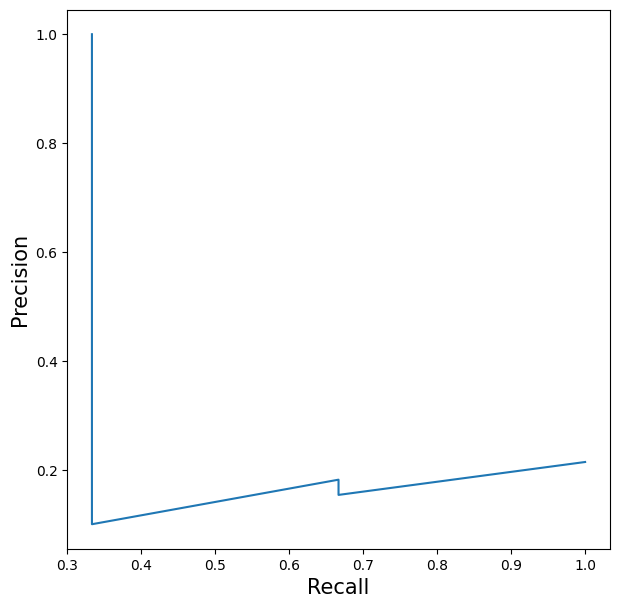

In [21]:
plt.figure(figsize=(7, 7)) 
plt.plot(recalls, precisions) 
plt.xlabel('Recall', fontsize=15) 
plt.ylabel('Precision', fontsize=15) 

### 04 F1 score

Both precision and recall range from 0 to 1 and a value closer to 1 is better.      
F1 score is a metric that combines both precision and recall. It is defined as a simple         
weighted average (harmonic mean) of precision and recall. If we denote precision        
using P and recall using R, we can represent the F1 score as:       
F1 = 2PR / (P + R)      
A little bit of mathematics will lead you to the following equation of F1 based on      
TP, FP and FN       
F1 = 2TP / (2TP + FP + FN)      

In [22]:
def f1(y_true, y_pred): 
    """ 
    Function to calculate f1 score 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: f1 score 
    """ 
    p = precision(y_true, y_pred) 
    r = recall(y_true, y_pred) 
    score = 2 * p * r / (p + r) 
    return score

In [23]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
1, 0, 0, 1, 1, 0, 0, 0, 1, 0]

print(f1(y_true, y_pred))

0.4


In [24]:
from sklearn import metrics

metrics.f1_score(y_true, y_pred)

0.4

Instead of looking at precision and recall individually, you can also just look at F1 score.        
Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1,       
and a perfect prediction model has an F1 of 1.      
When dealing with datasets that have skewed targets, we should look at F1(or precision and recall)      
instead of accuracy.        

Then there are other crucial terms that we should know about.

The first one is TPR or True Positive Rate, which is the same as recall.

TPR = TP/(TP + FN)      

In [ ]:
def tpr(y_true, y_pred): 
    """ 
    Function to calculate tpr 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: tpr/recall 
    """ 
    return recall(y_true, y_pred)

TPR or recall is also known as sensitivity.     
And FPR or False Positive Rate, which is defined as:        
FPR = FP/(TN+FP)        

In [25]:
def fpr(y_true, y_pred):
    """ 
    Function to calculate fpr 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: fpr 
    """ 
    fp = false_positive(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    return fp / (fp + tn)

And 1-FPR is known as specificity or True Negative Rate or TNR.     
There are a lot of terms, but the most important ones out of these are          
only TPR and FPR.